In [ ]:
#1Load the dataset
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from pandas.io.formats.style import plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/IBM/Churn_Modelling.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
#6 check for categorical column and perform encoding
dummy=pd.get_dummies(df['Gender'])
dummy.head()

,Female,Male
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [ ]:
df2=pd.concat((df,dummy),axis=1)
df2.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Female,Male
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,0
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,0
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,1,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1,0


In [ ]:
df2.drop(['Gender'],axis=1)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Female,Male
0,1,15634602,Hargrave,619,France,42,2,0.00,1,1,1,101348.88,1,1,0
1,2,15647311,Hill,608,Spain,41,1,83807.86,1,0,1,112542.58,0,1,0
2,3,15619304,Onio,502,France,42,8,159660.80,3,1,0,113931.57,1,1,0
3,4,15701354,Boni,699,France,39,1,0.00,2,0,0,93826.63,0,1,0
4,5,15737888,Mitchell,850,Spain,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,39,5,0.00,2,1,0,96270.64,0,0,1
9996,9997,15569892,Johnstone,516,France,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,9998,15584532,Liu,709,France,36,7,0.00,1,0,1,42085.58,1,1,0
9998,9999,15682355,Sabbatini,772,Germany,42,3,75075.31,2,1,0,92888.52,1,0,1


In [ ]:
df2=df2.drop(['Gender'],axis=1)
df2.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Female,Male
0,1,15634602,Hargrave,619,France,42,2,0.00,1,1,1,101348.88,1,1,0
1,2,15647311,Hill,608,Spain,41,1,83807.86,1,0,1,112542.58,0,1,0
2,3,15619304,Onio,502,France,42,8,159660.80,3,1,0,113931.57,1,1,0
3,4,15701354,Boni,699,France,39,1,0.00,2,0,0,93826.63,0,1,0
4,5,15737888,Mitchell,850,Spain,43,2,125510.82,1,1,1,79084.10,0,1,0


In [ ]:
df2=df2.drop(['Male'],axis=1)
df2.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Female
0,1,15634602,Hargrave,619,France,42,2,0.00,1,1,1,101348.88,1,1
1,2,15647311,Hill,608,Spain,41,1,83807.86,1,0,1,112542.58,0,1
2,3,15619304,Onio,502,France,42,8,159660.80,3,1,0,113931.57,1,1
3,4,15701354,Boni,699,France,39,1,0.00,2,0,0,93826.63,0,1
4,5,15737888,Mitchell,850,Spain,43,2,125510.82,1,1,1,79084.10,0,1


In [ ]:
df2.rename(columns={"Female":"Gender"})

,RowNumber,CustomerId,Surname,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender
0,1,15634602,Hargrave,619,France,42,2,0.00,1,1,1,101348.88,1,1
1,2,15647311,Hill,608,Spain,41,1,83807.86,1,0,1,112542.58,0,1
2,3,15619304,Onio,502,France,42,8,159660.80,3,1,0,113931.57,1,1
3,4,15701354,Boni,699,France,39,1,0.00,2,0,0,93826.63,0,1
4,5,15737888,Mitchell,850,Spain,43,2,125510.82,1,1,1,79084.10,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,39,5,0.00,2,1,0,96270.64,0,0
9996,9997,15569892,Johnstone,516,France,35,10,57369.61,1,1,1,101699.77,0,0
9997,9998,15584532,Liu,709,France,36,7,0.00,1,0,1,42085.58,1,1
9998,9999,15682355,Sabbatini,772,Germany,42,3,75075.31,2,1,0,92888.52,1,0


In [ ]:
df.shape

(10000, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
#4 Handling Missing Values
df.isnull().any()


RowNumber          False
CustomerId         False
Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

In [ ]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
#3 Descriptive stastical analysis
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
df.NumOfProducts.value_counts()

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64

In [ ]:
df.corr()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.000783,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.006495,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


In [ ]:
df['Age'].mean()

38.9218

In [ ]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [ ]:
#2 Visualization

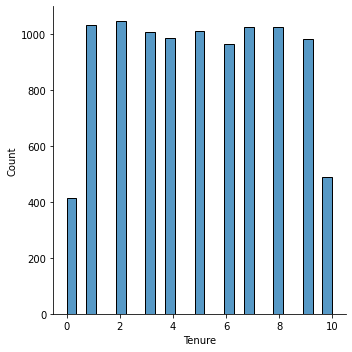

In [ ]:
#univariate analysis
sns.displot(df.Tenure)

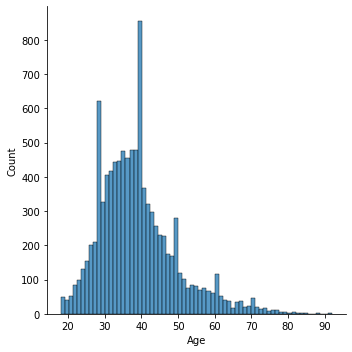

In [ ]:
sns.displot(df.Age)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdeb36bd910>,
      dtype=object)

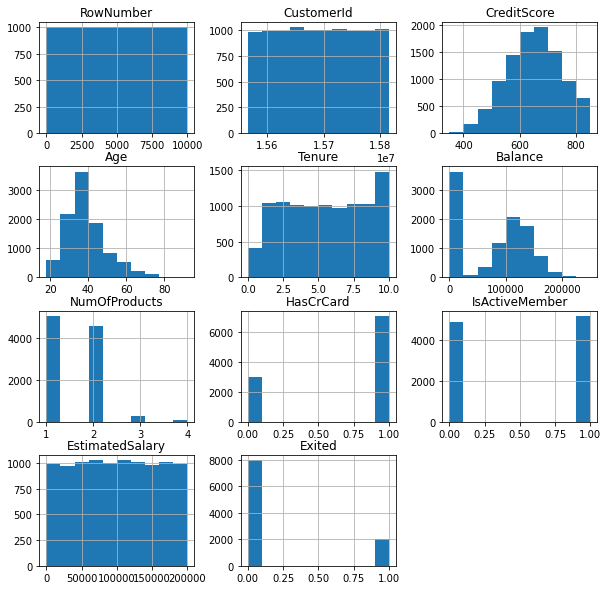

In [ ]:
df.hist(figsize=(10,10))

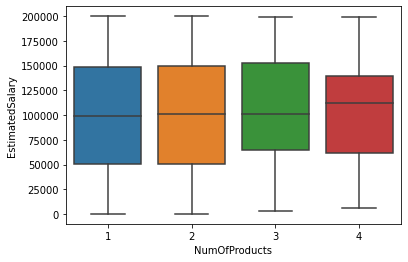

In [ ]:
#Boxplot
sns.boxplot(x='NumOfProducts',y='EstimatedSalary',data=df)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


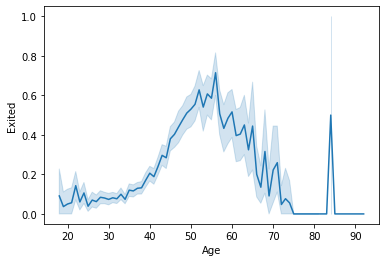

In [ ]:
# Bivariate Analysis on continuous variable
sns.lineplot(df.Age,df.Exited)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


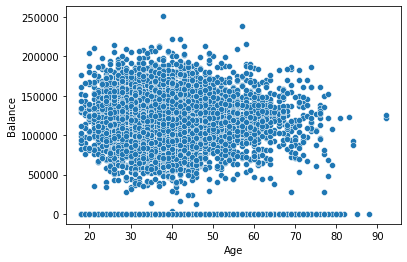

In [ ]:
sns.scatterplot(df.Age,df.Balance)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


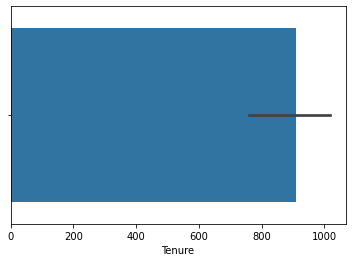

In [ ]:
# Bivariate Analysis on categorical variable
sns.barplot(df.Tenure.value_counts())

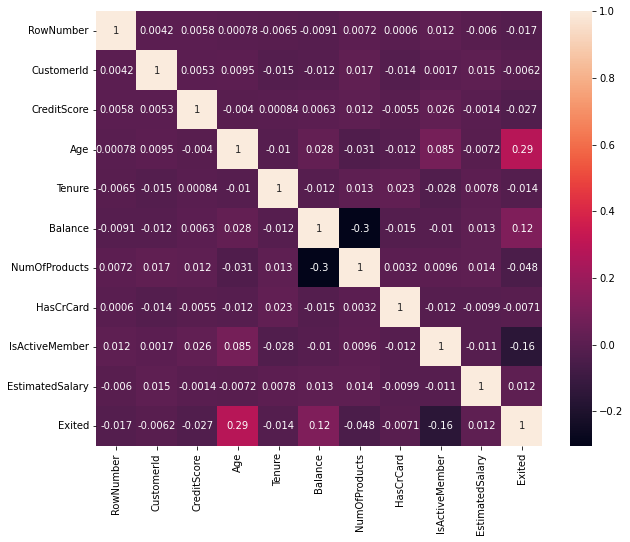

In [ ]:
fig=plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


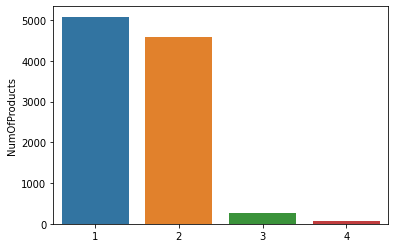

In [ ]:
sns.barplot(df.NumOfProducts.value_counts().index,df.NumOfProducts.value_counts())


<function matplotlib.pyplot.show(*args, **kw)>

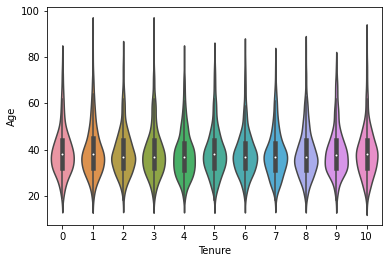

In [ ]:
sns.violinplot(x='Tenure',y='Age',data=df,size=8)
plt.show



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


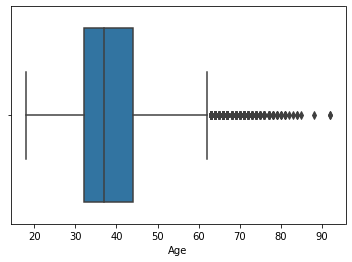

In [ ]:
sns.boxplot(df.Age)

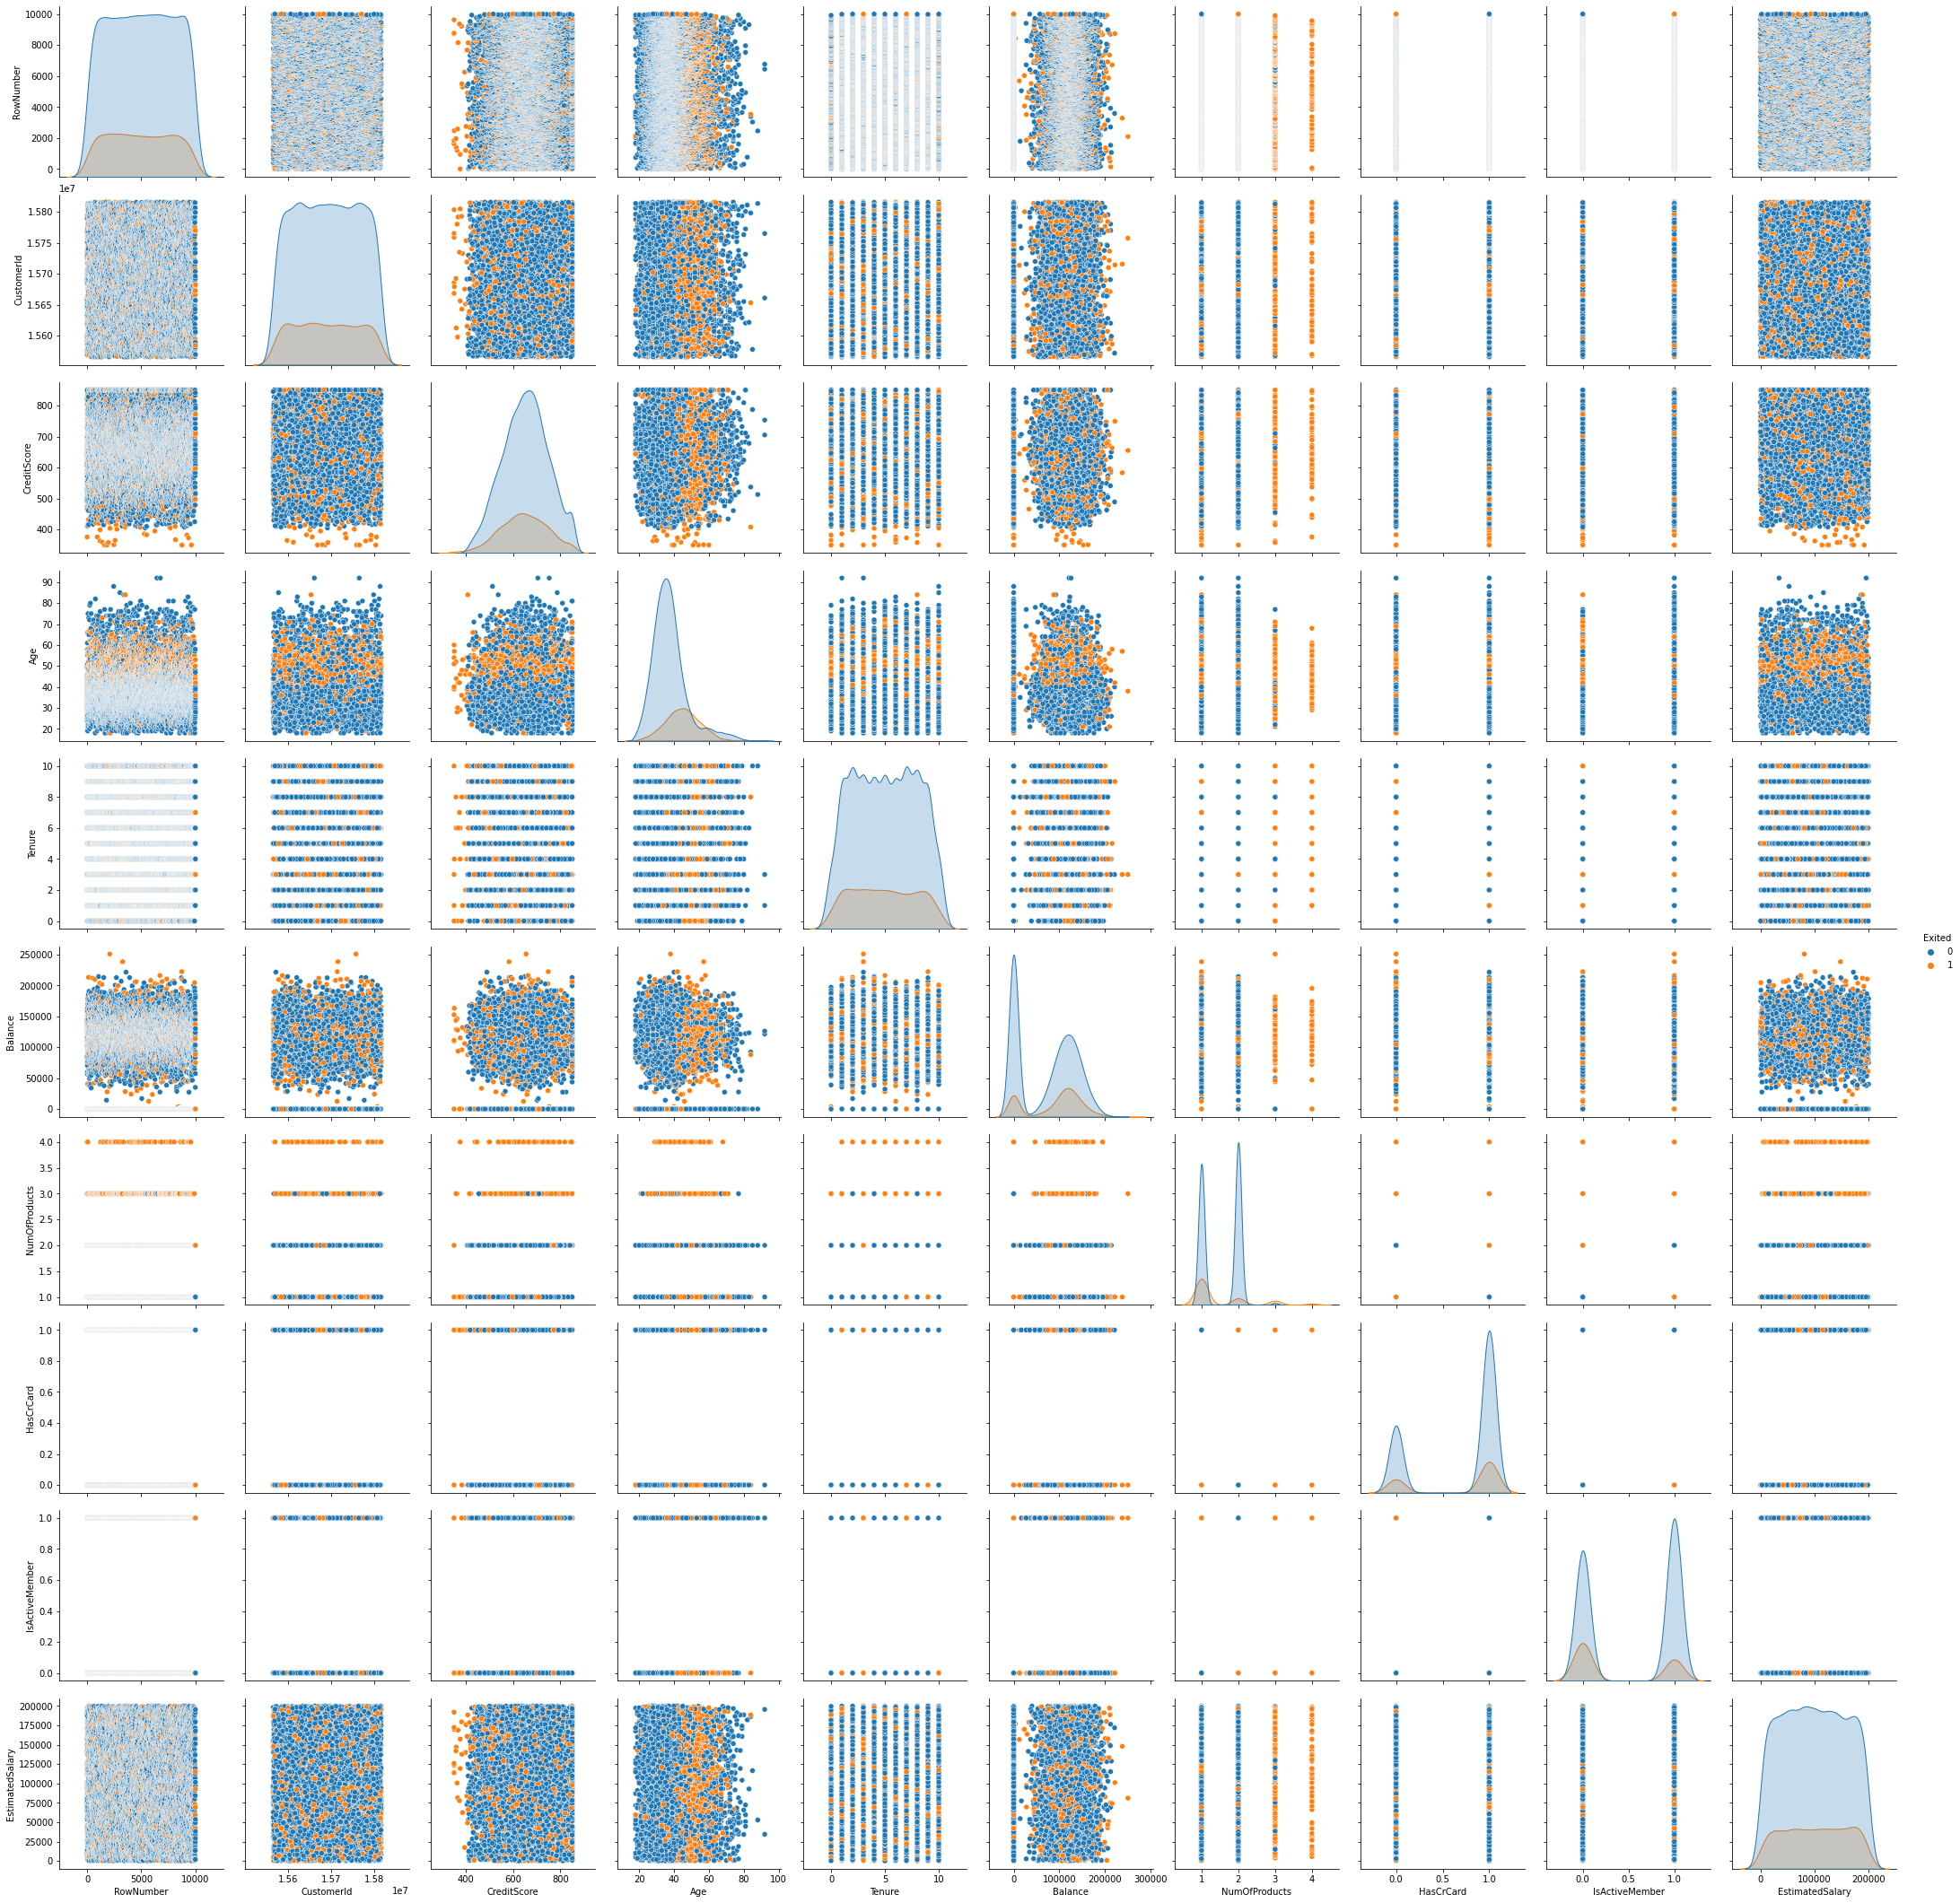

In [ ]:
#Multivariate analysis
sns.pairplot(data=df,hue='Exited',height=3)
plt.show()

In [ ]:
#5 Find the outlier and replace the outlier
#find the limits
upper_limit=df['Age'].mean()+3*df['Age'].std()
lower_limit=df['Age'].mean()-3*df['Age'].std()
print('upper_limit',upper_limit)
print('lower_limit',lower_limit)

upper_limit 70.38521935511383
lower_limit 7.458380644886169


In [ ]:
df.loc[(df['Age']>upper_limit)|(df['Age']<lower_limit)]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
85,86,15805254,Ndukaku,652,Spain,Female,75,10,0.00,2,1,1,114675.75,0
158,159,15589975,Maclean,646,France,Female,73,6,97259.25,1,0,1,104719.66,0
230,231,15808473,Ringrose,673,France,Male,72,1,0.00,2,0,1,111981.19,0
252,253,15793726,Matveyeva,681,France,Female,79,0,0.00,2,0,1,170968.99,0
310,311,15712287,Pokrovskii,652,France,Female,80,4,0.00,2,1,1,188603.07,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9646,9647,15603111,Muir,850,Spain,Male,71,10,69608.14,1,1,0,97893.40,1
9671,9672,15636061,Pope,649,Germany,Male,78,4,68345.86,2,1,1,142566.75,0
9736,9737,15644103,Wells,659,Spain,Male,78,2,151675.65,1,0,1,49978.67,0
9894,9895,15704795,Vagin,521,France,Female,77,6,0.00,2,1,1,49054.10,0


In [ ]:
#trimming - delete the outlier
new_df=df.loc[(df['Age']<upper_limit)&(df['Age']>lower_limit)]
print('Before removing outlier:',len(df))
print('After removing outlier:',len(new_df))

Before removing outlier: 10000
After removing outlier: 9867


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


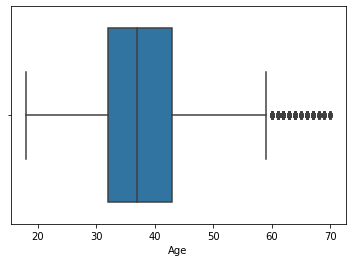

In [ ]:
sns.boxplot(new_df['Age'])

In [ ]:
#copying-change the outlier value to upper or lower limits values
new_df=df.copy()
new_df.loc[(new_df['Age']>upper_limit),'Age']=upper_limit
new_df.loc[(new_df['Age']<lower_limit),'Age']=lower_limit

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


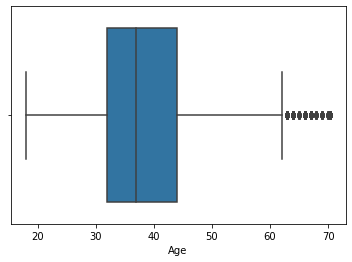

In [ ]:
sns.boxplot(new_df['Age'])

In [ ]:
len(new_df)

10000

In [ ]:
#IQR method
q1=df['Age'].quantile(0.25)
q3=df['Age'].quantile(0.75)
iqr=q3-q1

In [ ]:
q1,q3,iqr

(32.0, 44.0, 12.0)

In [ ]:
upper_limit=q3+(1.5*iqr)
lower_limit=q3-(1.5*iqr)
lower_limit,upper_limit

(26.0, 62.0)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


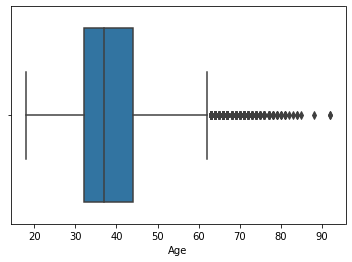

In [ ]:
sns.boxplot(df['Age'])

In [ ]:
#copying-change the outlier value to upper or lower limits values
new_df=df.copy()
new_df.loc[(new_df['Age']>upper_limit),'Age']=upper_limit
new_df.loc[(new_df['Age']<lower_limit),'Age']=lower_limit

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


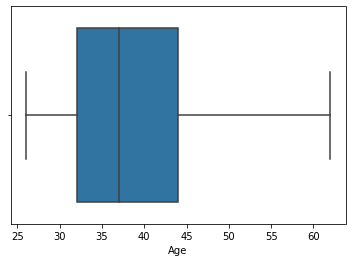

In [ ]:
sns.boxplot(new_df['Age'])